In [ ]:
# install bruges for Wavelets
# https://pypi.org/project/bruges/
pip instal bruges

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from tqdm import tqdm
import bruges.filters.wavelets as w
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# generate a random frequency wavelet
def wave_gen():
  # min and max frequency
	b =  [20, 50]
  # f is a random number: min = b[0], max = b[1]
	f = (np.random.rand(1)*(b[1]-b[0])) + b[0]
  # create a ricker with bruges.filters.wavelets
  # see https://bruges.readthedocs.io/api/bruges.filters.wavelets.html for info
	wave = w.ricker(1, 0.002, f)
  # define when the wavelet starts and cut at that value (to avoid shifts)
	cut = np.where(wave<-10**-4)[0][0]
	wave = wave[cut:]
  # find maximun value (usefull to make reference output to maximum phase)
	a=np.where(np.max(wave)==wave)[0][0]
	return wave, a

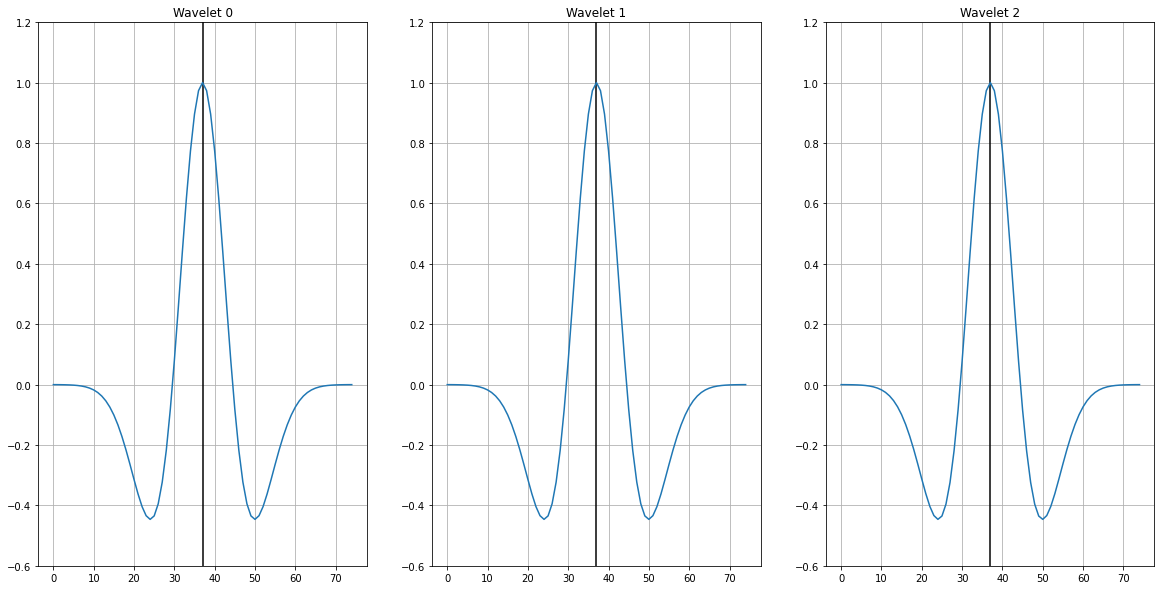

In [ ]:
# plot some random wavelet
plt.figure(figsize=[20, 10])
for i in range(3):
  plt.subplot('13' + np.str(i+1))
  plt.title('Wavelet ' + np.str(i))
  wavelet, max_w = wave_gen()
  plt.plot(wavelet[:75])
  plt.vlines(max_w, -0.6, 1.2)
  plt.ylim([-0.6, 1.2])
  plt.grid(True) 

In [ ]:
# generate random trace with length dz
def trace_gen(dz):
    # init trace (X_train) and y_train as zeros vector with length dz
    trace = np.zeros(dz)
    y_train = np.zeros(dz)
    # generate random wavelet
    wave, a = wave_gen()
    # number of random horizon
    rand_lay = np.random.randint(4, 10)
    # depth of random horizon [max dz-50]
    idx = np.random.randint(0, dz-50,rand_lay)
    # idx_val random [-1, 1]
    idx_val = (np.random.rand(rand_lay)-0.5) * 2
    # insert at idx pos idx_val spike
    trace[idx] = idx_val
    # convolve trace and wave
    trace_fin = signal.convolve(trace, wave)[:dz]
    # generate y_train at maximum phase (a is the shift)
    y_train[idx + a] = 1
    return trace_fin, y_train


In [ ]:
# dz is numeber of time steps
dz = 256
# it is number of traces
it = 1024

# init X_train and y_train matrix
X_train = np.zeros((it, dz))
y_train = np.zeros((it, dz))

In [ ]:
# for it times: generate a trace
for i in tqdm(range(it)):
    X_train[i, :], y_train[i, :] = trace_gen(dz)

100%|██████████| 250/250 [00:00<00:00, 4183.29it/s]


<Figure size 432x288 with 0 Axes>

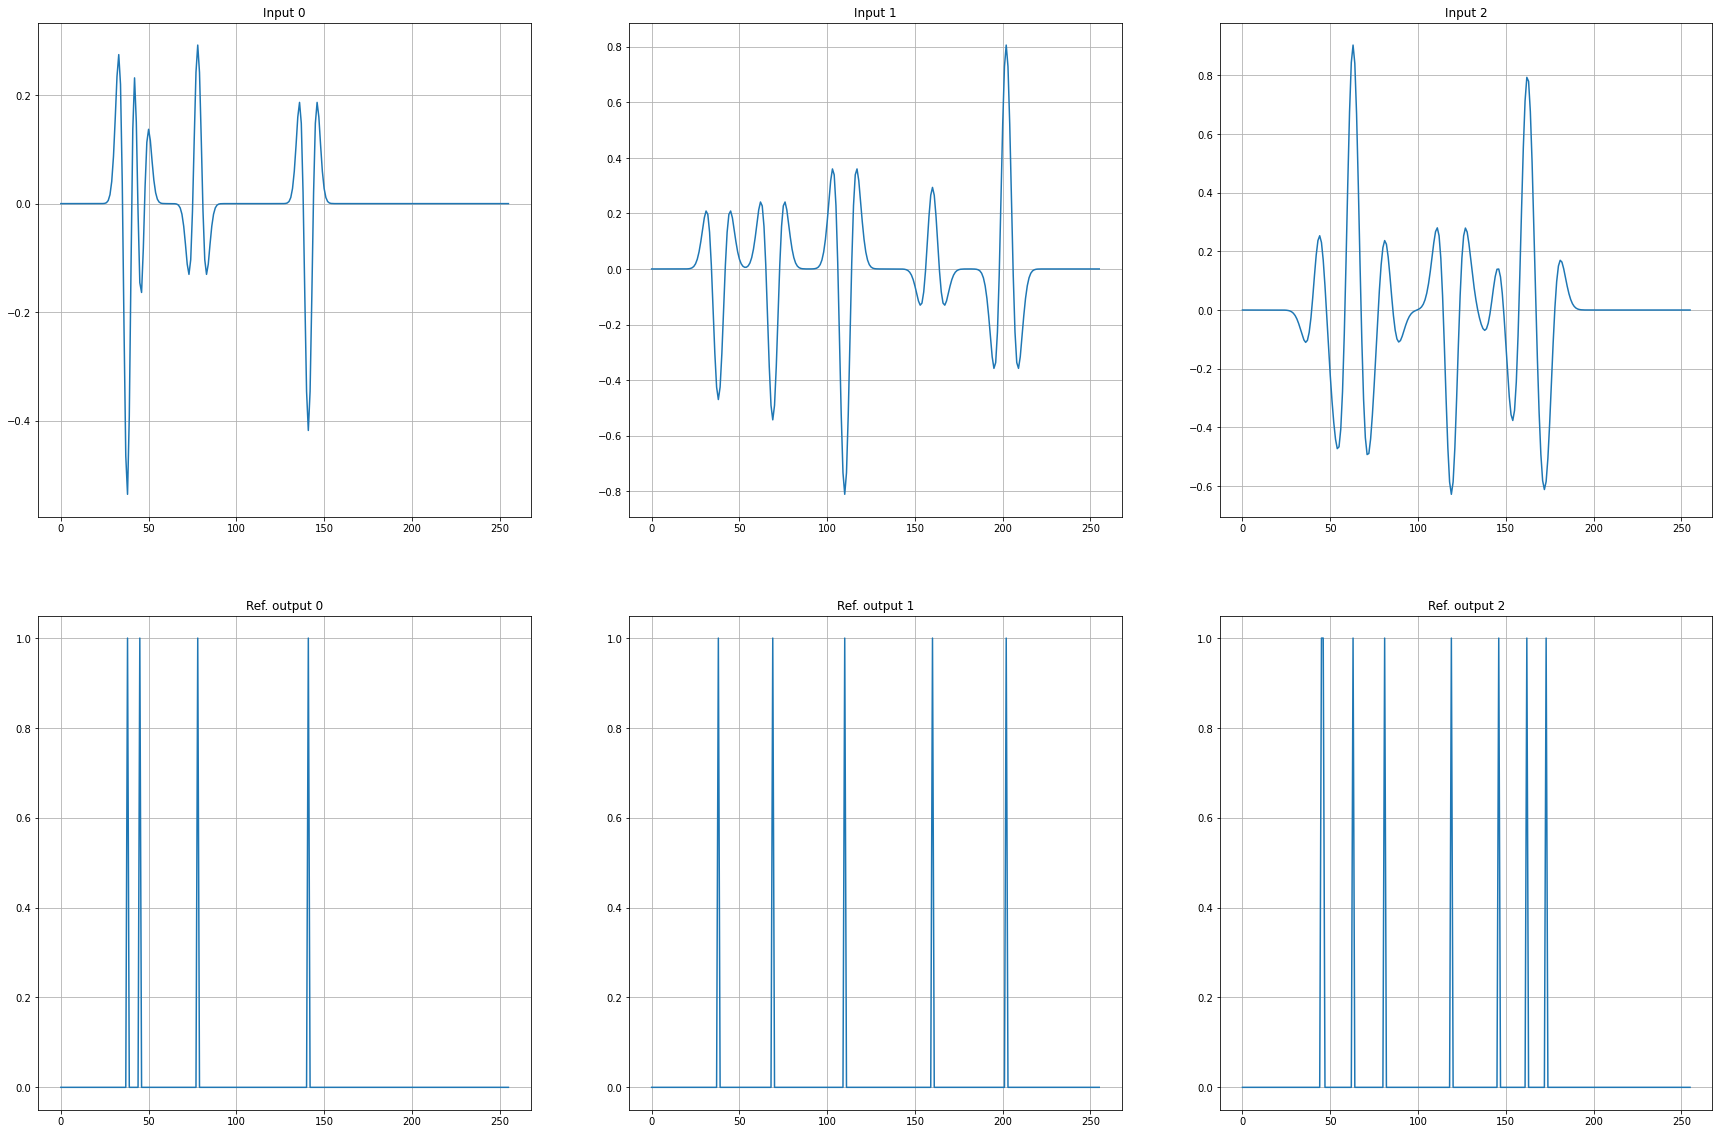

In [ ]:
# plot output example
plt.clf()
plt.figure(figsize=[30, 20])
for i in range(3):
  plt.subplot('23' + np.str(i+1))
  plt.title('Input ' + np.str(i))
  plt.plot(X_train[i, :])
  plt.grid(True) 
  plt.subplot('23' + np.str(i+4))
  plt.title('Ref. output ' + np.str(i))
  wavelet, max_w = wave_gen()
  plt.plot(y_train[i, :])
  plt.grid(True) 


In [ ]:
# generate random trace with length dz and different noises
def trace_gen_noise(dz):
  # init trace (X_train) and y_train as zeros vector with length dz
	trace = np.zeros(dz)
	y_train = np.zeros(dz)
  # generate a magnitude value [0.001, 0.1]
	mag = np.random.randint(1, 10, 1)/100
  # generate noise and renoise as random vectors of legth dz [-mag/2,  mag/2]
	noise = (np.random.rand(dz) * mag) - mag/2
	renoise = (np.random.rand(dz) * mag) - mag/2
  # generate random wavelet
	wave, a = wave_gen()
  # number of random horizon
	rand_lay = np.random.randint(1, 6)
  # depth of random horizon [max dz-50]
	idx = np.random.randint(0, dz-50,rand_lay)
  # idx_val random [-1, 1]
	idx_val = (np.random.rand(rand_lay)-0.5) * 2
  # insert at idx pos idx_val spike
	trace[idx] = idx_val
  # convolve trace and wave (no noise trace)
	trace_fin = signal.convolve(trace, wave)[:dz]
  # trace_fin0 noise added before convolution
	trace_fin0 = signal.convolve(trace + renoise, wave)[:dz]
  # trace_fin0 noise added after convolution
	trace_fin1 = signal.convolve(trace, wave)[:dz] +  renoise
  # trace_fin0 noise added before (trace_fin0) and after convolution
	trace_fin2 = trace_fin0 +  ((np.random.rand(dz) * mag/2) - mag/4)
  # generate y_train at maximum phase (a is the shift)
	y_train[idx + a] = 1
	return trace_fin, trace_fin0, trace_fin1, trace_fin2, y_train

In [ ]:
# dz is numeber of time steps
dz = 256
# it is number of traces
it = 250

# init X_train (no noise), X_train0 (noise before conv), X_train1 (noise after conv), X_train2 (noise before and after conv) and y_train matrix
X_train = np.zeros((it, dz))
X_train0 = np.zeros((it, dz))
X_train1 = np.zeros((it, dz))
X_train2 = np.zeros((it, dz))
y_train = np.zeros((it, dz))


In [ ]:
# for it times: generate a trace
for i in tqdm(range(it)):
	X_train[i, :], X_train0[i, :], X_train1[i, :], X_train2[i, :], y_train[i, :] = trace_gen_noise(dz)

100%|██████████| 250/250 [00:00<00:00, 2243.99it/s]


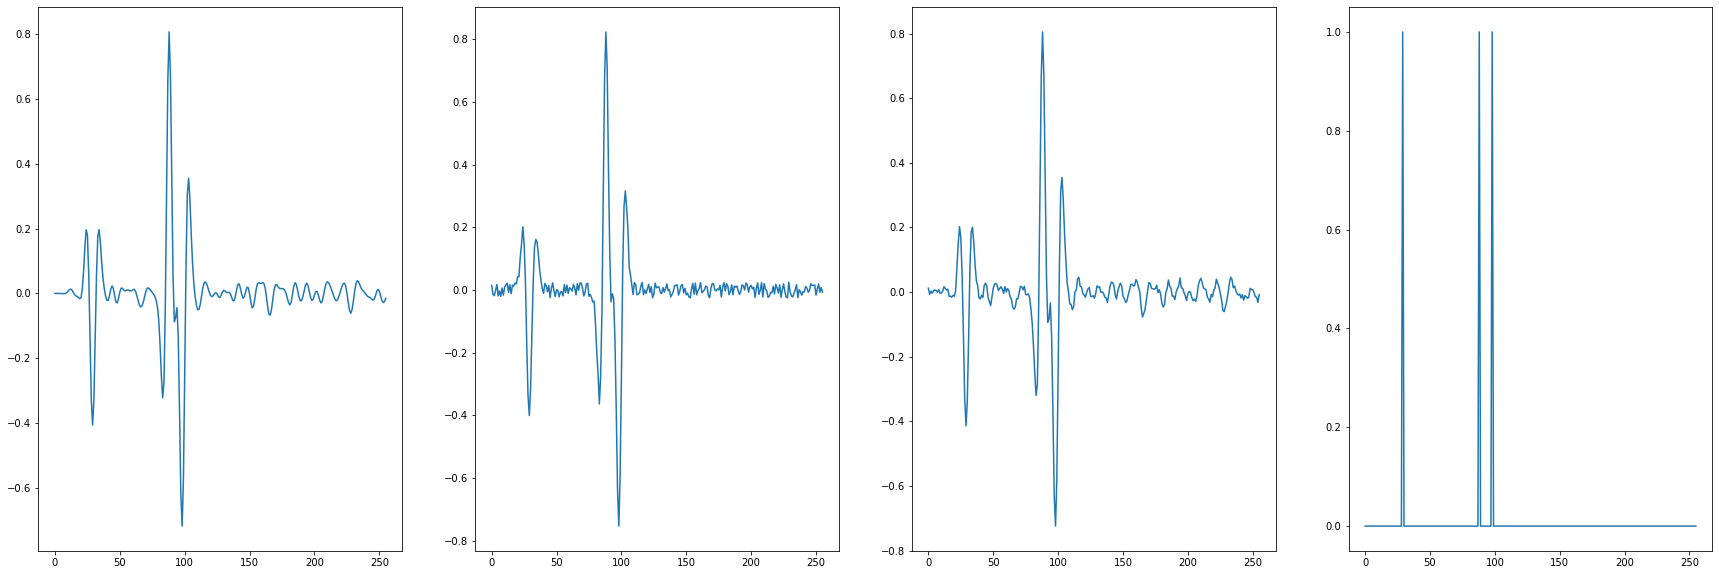

In [ ]:
i = 0
plt.figure(figsize = [30,10])
plt.subplot(141)
plt.plot(X_train0[i, :])
plt.subplot(142)
plt.plot(X_train1[i, :])
plt.subplot(143)
plt.plot(X_train2[i, :])
plt.subplot(144)
plt.plot(y_train[i, :])

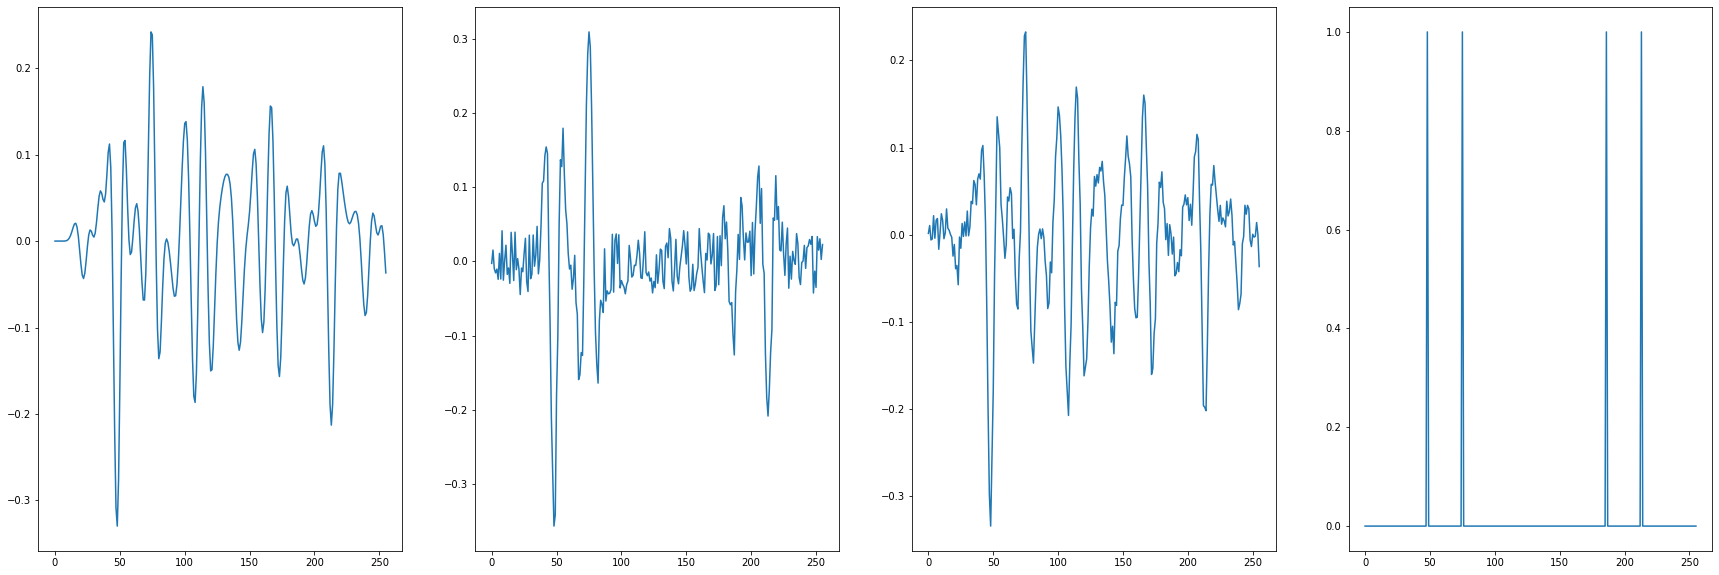

In [ ]:
i = 1
plt.figure(figsize = [30,10])
plt.subplot(141)
plt.plot(X_train0[i, :])
plt.subplot(142)
plt.plot(X_train1[i, :])
plt.subplot(143)
plt.plot(X_train2[i, :])
plt.subplot(144)
plt.plot(y_train[i, :])